In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_movie=pd.read_csv('movie dataset small/ml-latest-small/movies.csv')

In [3]:
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movie.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [5]:
df_movie.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
df_movie.min()

movieId                     1
title              '71 (2014)
genres     (no genres listed)
dtype: object

In [7]:
df_movie.max()

movieId                                       193609
title      À nous la liberté (Freedom for Us) (1931)
genres                                       Western
dtype: object

In [8]:
df_movie.std()

movieId    52160.494854
dtype: float64

In [9]:
df_movie.mean()

movieId    42200.353623
dtype: float64

In [10]:
is_genres_fantasy=df_movie['genres'].str.contains('Fantasy')

In [11]:
df_movie[is_genres_fantasy][:10]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
40,44,Mortal Kombat (1995),Action|Adventure|Fantasy
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
109,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
159,188,"Prophecy, The (1995)",Fantasy|Horror|Mystery
160,189,Reckless (1995),Comedy|Fantasy
169,201,Three Wishes (1995),Drama|Fantasy
209,243,Gordy (1995),Children|Comedy|Fantasy


In [12]:
df_ratings=pd.read_csv('movie dataset small/ml-latest-small/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### checking null values in df and droping null values

In [40]:
df_ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [41]:
df_movie.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [ ]:
# if there is any null value then use drop null values

df_ratings=df_ratings.dropna()
df_movie=df_movie.dropna()

### Joining two dataframes

In [13]:
'''
Joining two dataframes df_movie and df_ratings

'''

df_join=df_movie.merge(df_ratings,how='inner',on='movieId')
df_join.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Group By and Aggregate 

In [14]:
df_join[['rating','movieId']].groupby('movieId').count()[:10]

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
6,102
7,54
8,8
9,16


In [15]:
df_join[['movieId','title','rating']].groupby('rating').max().sort_values('rating',ascending=False)

,movieId,title
rating,,
5.0,187717,¡Three Amigos! (1986)
4.5,191005,eXistenZ (1999)
4.0,193609,¡Three Amigos! (1986)
3.5,193587,¡Three Amigos! (1986)
3.0,193567,¡Three Amigos! (1986)
2.5,189713,¡Three Amigos! (1986)
2.0,185033,¡Three Amigos! (1986)
1.5,190215,xXx: State of the Union (2005)
1.0,190221,À nous la liberté (Freedom for Us) (1931)


### Vectorized String Operations

In [16]:
movie_genres=df_join['genres'].str.split('|',expand=True)

In [17]:
movie_genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
3,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
4,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
100831,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
100832,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
100833,Drama,None,None,None,None,None,None,None,None,None
100834,Action,Animation,None,None,None,None,None,None,None,None


In [18]:
'''
extracing title column and creating a new column year

'''
df_join['year']=df_join['title'].str.extract('.*\((.*)\).*',expand=True)
df_join.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


In [19]:
'''
removing year string from title column

'''
df_join['title']=df_join['title'].str.split('(',n=1,expand=True)[0]
df_join

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2017
100832,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5,1537109545,2017
100833,193585,Flint,Drama,184,3.5,1537109805,2017
100834,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5,1537110021,2018


### Parsing Timestamps

In [20]:
df_join['parsed_time'] = pd.to_datetime(df_join['timestamp'], unit='s')

In [21]:
df_join.head()

,movieId,title,genres,userId,rating,timestamp,year,parsed_time
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995,2000-07-30 18:45:03
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995,1996-11-08 06:36:02
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995,2005-01-25 06:52:26
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995,2017-11-13 12:59:30
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995,2011-05-18 05:28:03


In [22]:
df_join=df_join.drop('timestamp',axis=1)

In [23]:
df_join.head()

,movieId,title,genres,userId,rating,year,parsed_time
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,2000-07-30 18:45:03
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995,1996-11-08 06:36:02
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1995,2005-01-25 06:52:26
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1995,2017-11-13 12:59:30
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1995,2011-05-18 05:28:03


In [29]:
corelation=df_join.corr()

,movieId,userId,rating
movieId,1.000000,0.006773,-0.004061
userId,0.006773,1.000000,-0.049348
rating,-0.004061,-0.049348,1.000000


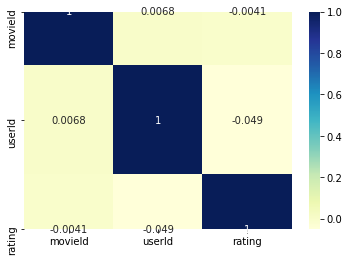

In [36]:
sns.heatmap(corelation,annot=True,cmap='YlGnBu')

### Average Movie Ratings over Time

In [24]:
avg_movie_rating=df_join[['movieId','rating']].groupby('movieId',as_index=False).mean()
avg_movie_rating[:10]

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
5,6,3.946078
6,7,3.185185
7,8,2.875000
8,9,3.125000
9,10,3.496212


In [38]:
avg_yearly_movie_rating=df_join[['year','rating']].groupby('year',as_index=False).mean()
avg_yearly_movie_rating

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.600000
...,...,...
102,2014,3.512879
103,2015,3.410386
104,2016,3.387261
105,2017,3.578091


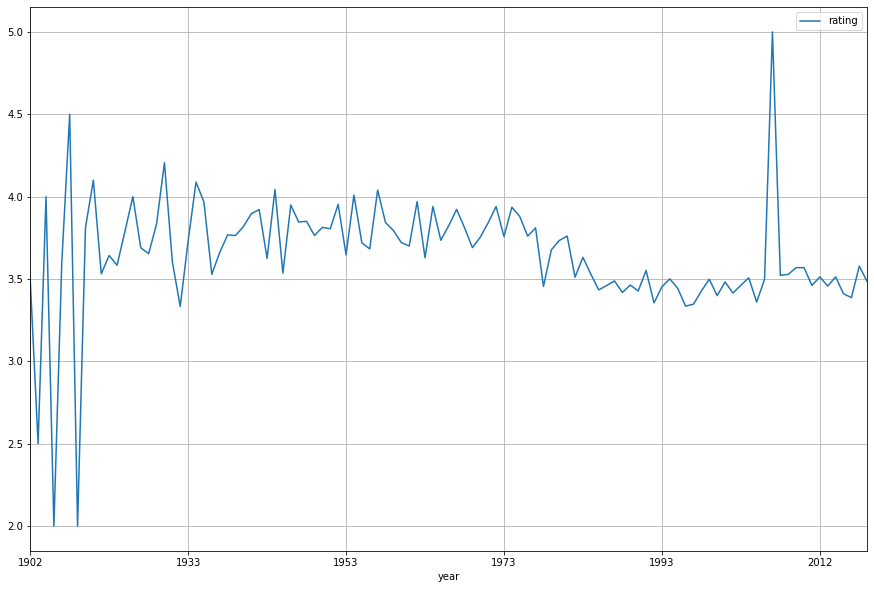

In [39]:
avg_yearly_movie_rating.plot(x='year', y='rating', figsize=(15,10), grid=True)